# Формализуйте постановку задачи
a. Будет решаться задача классификации. Подходя к этому заданию я уже слышала о задаче imdb, поэтому решила делать аналогичную классификацию, найдя очень удобный сайт, с аналогичной разметкой от 0 до 1 http://www.banki.ru/services/responses/list/ -- я оканчанельно решела решать задачу классификации.

b. Оценки пользователей от 1 до 5.

c. Будет оцениваться точность предсказания класса отзыва.

d. Язык -- русский, длина -- от пары предложений (иначе tfidf  плохой) до нескольких абзацев, датасет включает в себя сленг, поэтому можно использовать сленговые слова, также допискаются грамматические ошибки, однако, они могут ухудшать результат предсказания.

(0.5 часа)

# Соберите данные
Найти готовую выбоку совсем не получилось.

Собирем 20.000 примеров с сайта о банках, с помощью кроулера на scrapy. Также попробовала реализовать на grab, нона нем нет столько примеров, сколько есть на scrapy (почти 95% кода из примеров).

2 часа

In [5]:
#!scrapy crawl banki_crawler -o ../banki.csv -t csv

In [95]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv('banki.csv')
df.head()

,url,bank,title,text,comments,score
0,http://www.banki.ru/services/responses/bank/re...,Тинькофф Банк,Всё прекрасно,"На сайте оформил заявку, в этот же день мне по...",0,5
1,http://www.banki.ru/services/responses/bank/re...,Сбербанк России,Длительное рассмотрение заявления на снижение ...,Добрый день.,1,1
2,http://www.banki.ru/services/responses/bank/re...,Интерпромбанк,Выгодные условия,Искала варианты рефинансирования кредитов. Об ...,0,5
3,http://www.banki.ru/services/responses/bank/re...,СМП Банк,Телефонная связь с банком отсутствует,Связаться с оператором по телефону 8 800 555-2...,2,2
4,http://www.banki.ru/services/responses/bank/re...,Сбербанк России,Обман пенсионеров.,"Моя бабушка, пенсионер, обслуживается в офисе ...",2,1


In [124]:
print(len(df))
any(np.isnan(df.score))

20016


False

In [125]:
df = df[pd.notnull(df['text'])]
print(len(df))

19835


Различные Score

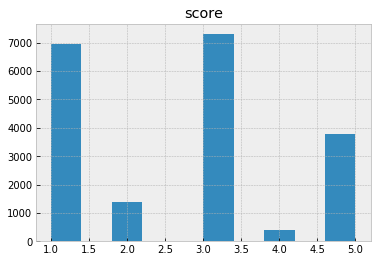

In [126]:
df.hist('score');

Сохраним в результат формате `h5`, чтобы сразу получить его из питона в том же виде, когда понадобится.

In [127]:
df.to_hdf('banki.h5', 'df', mode='w', format='t')

# Постройте какую-нибудь несложную модель

Была выбрана линейная модель, потому что она нормально отработала, и в задание не просили подгонять результаты для улучшения модели.

In [128]:
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib

Векторизуем tf-idf, загоняев в SGDClassifier.

In [ ]:
vectorizer = TfidfVectorizer(max_features=10)
df = pd.read_hdf('banki.h5')
x = df.text
y = df.score
x_v = vectorizer.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_v, y, test_size=0.1)

In [192]:
x[19937]

'Являюсь клиентом Сбербанка всю свою сознательную жизнь, имею ипотеку в этом банке и исправно погашаю. Но внезапно 23.08.2017 года приходит смс о списании денежных средств с дебетовой карты в размере 10 000 рублей. На карте было 6000 рублей, а стало -4000! Я звоню в службу поддержки и они записывают обращение № 170823 0559 688600 от 23.08.2017 срок рассмотрения не позднее 12.09.17 Когда подошло 12-е число я звоню опять же в службу 900, где мне говорят, что это произошёл сбой системы с организацией VIZA и наш банк добивается ответа сейчас от этой организации. Через несколько минут приходит смс, где продлевают срок рассмотрения на 30 дней с момента подачи заявки. Хорошо ждем... И что вы думаете - мне пришло сегодня 23.09.17? Новая смс о продлении срока рассмотрения на 60 дней'

In [187]:
df[df.score == 1]

,url,bank,title,text,comments,score
1,http://www.banki.ru/services/responses/bank/re...,Сбербанк России,Длительное рассмотрение заявления на снижение ...,Добрый день.,1,1
4,http://www.banki.ru/services/responses/bank/re...,Сбербанк России,Обман пенсионеров.,"Моя бабушка, пенсионер, обслуживается в офисе ...",2,1
7,http://www.banki.ru/services/responses/bank/re...,Росбанк,Не работает мобильное приложение,Пользуюсь услугами данного банка уже около 2 м...,1,1
10,http://www.banki.ru/services/responses/bank/re...,СМП Банк,СМП сегодня очень насторожил. Деньги заказывал...,СМП сегодня очень насторожил. Деньги заказывал...,1,1
16,http://www.banki.ru/services/responses/bank/re...,Сбербанк России,Отказ в выдаче Visa Momentum,"Сегодня, 16 декабря 2017 г., я заехал в отделе...",0,1
18,http://www.banki.ru/services/responses/bank/re...,Газпромбанк,Отсутствие реакции на заявление о пересмотре п...,"Занялся рефинансированием ипотеки, взятой в ГП...",0,1
19,http://www.banki.ru/services/responses/bank/re...,Альфа-Банк,БЕСПРЕДЕЛ СЕНТИНЕЛ,"Хочу с вами поделиться тем, что написал жалобу...",9,1
20,http://www.banki.ru/services/responses/bank/re...,ВТБ Банк Москвы,"Безопасность на ""высшем"" уровне",Нашли в торговом автомате чужую карту Банка Мо...,0,1
22,http://www.banki.ru/services/responses/bank/re...,Восточный Банк,Кредит Сезонный,Банк проводит обманную рекламу по ставкам кред...,0,1
23,http://www.banki.ru/services/responses/bank/re...,Банк «ФК Открытие»,Обманным путем перевели в НПФ,14.12.2017 в 9:59 в филиале Петровский ПАО Бан...,1,1


In [169]:
clf = linear_model.SGDClassifier()
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

0.355342741935


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Сойдет. Переобучим на всей выборке и сохраним модель.

In [207]:
clf.fit(x_v, y)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [208]:
joblib.dump(clf, 'clf.pkl')

['clf.pkl']

#  Реализуйте демонстрацию работы вашего алгоритма

Добавлена функция предсказания

(1 час)

In [134]:
from IPython.display import Image

In [219]:
!python3 example.py

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [18/Dec/2017 22:10:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Dec/2017 22:10:18] "POST / HTTP/1.1" 200 -
^C


На оценку 5

На сайте оформил заявку, в этот же день мне позвонили из банка - и завтра я уже встретился с менеджером Игорем Кочневым, который передал мне карту, грамотно и терпеливо ответил на все мои вопросы. Я задерживался по делам - он подожал полчаса меня в назначенном месте. По сравнению со сбером удивляет клиентоориентированность банка.

Скриншоты с примерами работы.

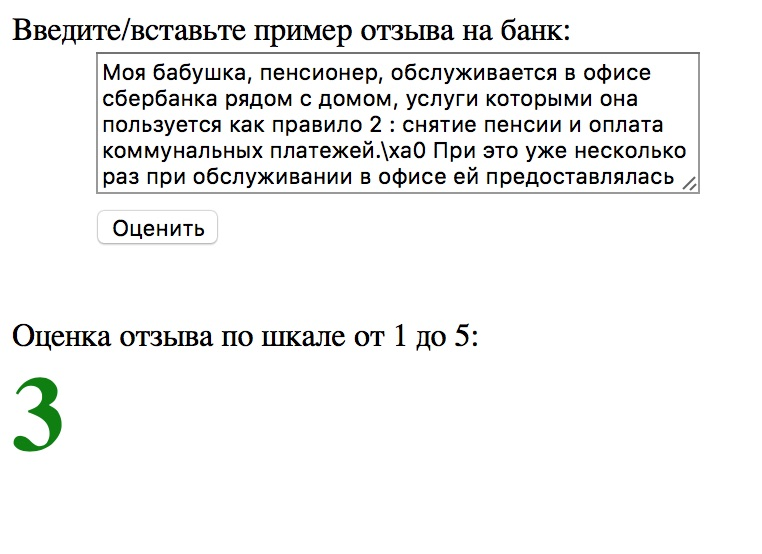

In [223]:
Image(filename='3.jpg')

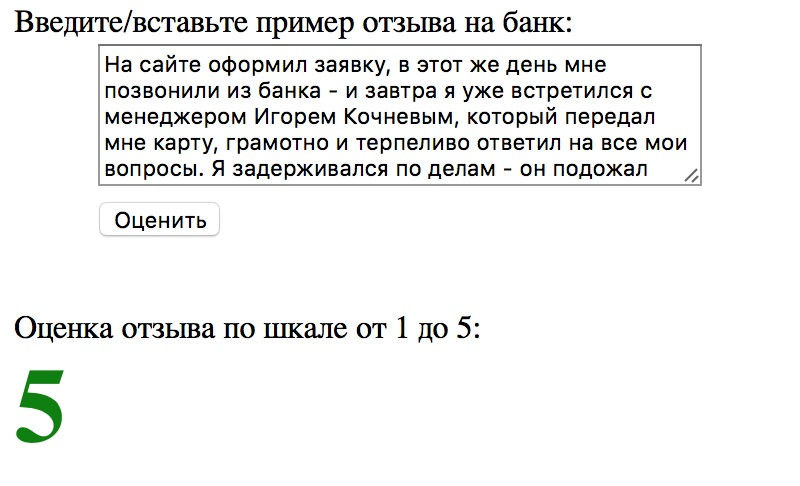

In [224]:
Image(filename='5.jpg')